![alt text](images/Kusto.jpg "Kusto Magic")

# Kqlmagic Quick Start
1. Press F11 to switch browser to full screen mode  
2. If in running jupyter lab, in View tab, select 'Single-Document Mode' and 'Presentation Mode' or  (Ctrl + Shift + D)  
3. In Kernel tab, select 'Restart Kernel and Clear All Outputs...', to start from fresh
4. Repeat: press Shift+Enter to run cells sequentially

## Make sure that you have the lastest version of  Kqlmagic
Download Kqlmagic from PyPI and install/update
(if latest version is already installed you can skip this step)

In [ ]:
#!pip install Kqlmagic --upgrade

## If you want to pre-set defaults, set environment varaible, before activation notebook, or within notebook
- **KQLMAGIC_NOTEBOOK_APP** - set the notebook application (default **jupyternotebook**)
- **KQLMAGIC_LOAD_MODE** - set the kqlmagic load mode (default **verbose**). If silent, it will load without welcome output
- **KQLMAGIC_CONFIGURATION** - modify the default configuration, key=value pairs must be separated by a **semicolon**

- **KQLMAGIC_CONNECTION_STR** - set the default connection string (default **None**). If set it will connect to it on Kqlmagic load

In [ ]:
# you can try it within the notebook, by setting the environment variable using %env magic

#%env KQLMAGIC_NOTEBOOK_APP=jupyterlab
#%env KQLMAGIC_LOAD_MODE=silent
#%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"

#%env KQLMAGIC_CONNECTION_STR=loganalytics://tenant='<your-tenat-id>';clientid='<your-aad-appid>';clientsecret='<your-aad-key>';workspace='<your-workspace-id>';alias='<your-workspace-friendly-name>'

## Add Kqlmagic to notebook magics

C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure



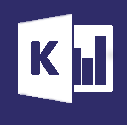

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks
popd -> c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks


In [1]:
%pushd C:\My Projects\jupyter-Kqlmagic-microsoft-vsc\azure
%reload_ext Kqlmagic
%popd

  - ### <span style="color:#82CAFA">*Note: information is included in the Kqlmagic banner, and in the note below it, with version and location of the open source code*</span>
  - ### <span style="color:#82CAFA">*Note: after Kqlmagic was loaded, kql reference was added to Help menu (Help tab)*</span>

## Connect to workspace@loganalytics
there are few options to authenticate with Log Analytics:<br>
```python
%kql loganalytics://code;workspace='<workspace-id>';alias='<workspace-friendly-name>'
```
```python
%kql loganalytics://tenant='<tenant-id>';clientid='<aad-appid>';clientsecret='<aad-appkey>';workspace='<workspace-id>';alias='<workspace-friendly-name>'
```
```python
%kql loganalytics://username='<username>';password='<password>';workspace='<workspace-id>';alias='<workspace-friendly-name>'
```

Notes:<br>
(1) authentication with appkey works only for the demo.<br>
(2) username/password works only on corporate network.<br>
(3) alias is optional.<br>
(4) if credentials are missing, and a previous connection was established the credentials will be inherited.<br>
(5) if secret (password / clientsecret) is missing, user will be prompted to provide it.<br>
(6) if tenant is missing, and a previous connection was established the tenant will be inherited.

In [2]:
%kql loganalytics://workspace='DEMO_WORKSPACE';appkey='DEMO_KEY';alias='myworkspace'

<IPython.core.display.Javascript object>

  - ### <span style="color:#82CAFA">*Note - popup window that opened with the database@cluster schema*</span>
  - ### <span style="color:#82CAFA">*Note - Help menu contains the databse@cluster schema*</span>

## Once connected you can query the current workspace@loganalytics

In [3]:
%kql Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

## Python code can access the result by the \_ variable

In [4]:
_

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

## Converts result data to a dataframe

In [5]:
df = _.to_dataframe()
df

,ResourceGroup,count_
0,contosoazurehq,2476785
1,contosoonpremhq,950419
2,contosoautomation,567402
3,aztest,339832
4,ContosoRetailDev1,268794
5,contosoretail100,266503
6,contosovma6ab,250005
7,contoso,242173
8,contosoiis,233345
9,contosoa2ademo2,231644


In [6]:
df.head()

,ResourceGroup,count_
0,contosoazurehq,2476785
1,contosoonpremhq,950419
2,contosoautomation,567402
3,aztest,339832
4,ContosoRetailDev1,268794


In [7]:
df.ResourceGroup

0       contosoazurehq
1      contosoonpremhq
2    contosoautomation
3               aztest
4    ContosoRetailDev1
5     contosoretail100
6        contosovma6ab
7              contoso
8           contosoiis
9      contosoa2ademo2
Name: ResourceGroup, dtype: object

In [8]:
df.min()

ResourceGroup    ContosoRetailDev1
count_                      231644
dtype: object

In [9]:
df.to_json()

'{"ResourceGroup":{"0":"contosoazurehq","1":"contosoonpremhq","2":"contosoautomation","3":"aztest","4":"ContosoRetailDev1","5":"contosoretail100","6":"contosovma6ab","7":"contoso","8":"contosoiis","9":"contosoa2ademo2"},"count_":{"0":2476785,"1":950419,"2":567402,"3":339832,"4":268794,"5":266503,"6":250005,"7":242173,"8":233345,"9":231644}}'

In [10]:
df.columns

Index(['ResourceGroup', 'count_'], dtype='object')

## Excution of another cell overrides \_ , However,  \_kql\_raw\_result\_ python variable holds last kql query result 

In [11]:
_

Index(['ResourceGroup', 'count_'], dtype='object')

In [12]:
_kql_raw_result_

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

In [13]:
_

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

## Show a chart, render the query to the proper chart

In [14]:
%kql Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render piechart title='my apple pie' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [contosoazu…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

  - ### <span style="color:#82CAFA">*Note: the chart is interactive, hoover to the right upper corner to get the menu, click on the legend to toggle facets, hoover on the chart to get value and percentage*</span>

## Assign kql query result to a python variable

In [15]:
%kql my_bar_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render barchart title='my bar chart'

  - ### <span style="color:#82CAFA">*Note: nothing is displayed when the result is assigtned to a variable*</span>

## Display kql result object

In [16]:
my_bar_chart

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

## Access table data

In [17]:
my_bar_chart.show_table()

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


In [18]:
my_bar_chart[1]

{'ResourceGroup': 'contosoonpremhq', 'count_': 950419}

In [19]:
my_bar_chart[1][1:]

{'count_': 950419}

In [20]:
my_bar_chart[1]['ResourceGroup']

'contosoonpremhq'

In [21]:
my_bar_chart[1:5]

[{'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794}]

## Cell mixed with single line kql queries 

In [22]:
%kql bar_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
%kql pie_chart << Heartbeat | where ResourceGroup != '' | summarize count() by ResourceGroup | sort by count_ | limit 10 | render piechart title='my pie chart'
display(bar_chart)
display(pie_chart)

+-------------------+---------+
|   ResourceGroup   |  count_ |
+-------------------+---------+
|   contosoazurehq  | 2476785 |
|  contosoonpremhq  |  950419 |
| contosoautomation |  567402 |
|       aztest      |  339832 |
| ContosoRetailDev1 |  268794 |
|  contosoretail100 |  266503 |
|   contosovma6ab   |  250005 |
|      contoso      |  242173 |
|     contosoiis    |  233345 |
|  contosoa2ademo2  |  231644 |
+-------------------+---------+


FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

FigureWidget({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'labels': [contosoazu…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

  - ### <span style="color:#82CAFA">*Note: single line magics (starts with only one \%) can share the same cell with python code*</span>

## Multiline query 

In [23]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ 
    | limit 10
    | render columnchart title='my column chart' 

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

  - ### <span style="color:#82CAFA">*Note: that this is a multiline magic, it starts with \%\%. It can include only kql code*</span>

## Show last chart result as a table

In [24]:
_.show_table()

ResourceGroup,count_
contosoazurehq,2476785
contosoonpremhq,950419
contosoautomation,567402
aztest,339832
ContosoRetailDev1,268794
contosoretail100,266503
contosovma6ab,250005
contoso,242173
contosoiis,233345
contosoa2ademo2,231644


## Show last result in a popup window

In [25]:
_.popup()

## Resize poup window, and to adjust the chart inside the window press F5

  - ### <span style="color:#82CAFA">*Note: when you F5, you loose the latest chart display state*</span>

## Show last chart result as a table in a popup window

In [26]:
_kql_raw_result_.popup_table()

## More complex chart

In [27]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ 
    | limit 10
    | extend count2 = count_*count_ 
    | limit 10 
    | render piechart title='my pie chart #2' 

FigureWidget({
    'data': [{'domain': {'x': [0.0, 0.475], 'y': [0.0, 1.0]},
              'labels': [contosoa…

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'contoso', 'count_': 242173, 'count2': 58647761929},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736}]

## Convert result data to dictionary of columns

In [28]:
dict_of_columns = _kql_raw_result_.to_dict()
print(dict_of_columns)

{'ResourceGroup': ('contosoazurehq', 'contosoonpremhq', 'contosoautomation', 'aztest', 'ContosoRetailDev1', 'contosoretail100', 'contosovma6ab', 'contoso', 'contosoiis', 'contosoa2ademo2'), 'count_': (2476785, 950419, 567402, 339832, 268794, 266503, 250005, 242173, 233345, 231644), 'count2': (6134463936225, 903296275561, 321945029604, 115485788224, 72250214436, 71023849009, 62502500025, 58647761929, 54449889025, 53658942736)}


In [29]:
_kql_raw_result_.to_csv('csv_file.csv')
#%cat csv_file.csv

csv results at c:\My Projects\jupyter-Kqlmagic-microsoft-vsc\notebooks\csv_file.csv

# Get last kql query attributes 

## Query string

In [30]:
_kql_raw_result_.query

"Heartbeat \n    | where ResourceGroup != '' \n    | summarize count() by ResourceGroup \n    | sort by count_ \n    | limit 10\n    | extend count2 = count_*count_ \n    | limit 10 \n    | render piechart title='my pie chart #2'"

## Query render title

In [31]:
_kql_raw_result_.title

'my pie chart #2'

## Query render visualization

In [32]:
_kql_raw_result_.visualization

'piechart'

## Number of records in query response 

In [33]:
_kql_raw_result_.records_count

10

## List of columns in query table response

In [34]:
_kql_raw_result_.columns_name

['ResourceGroup', 'count_', 'count2']

## Kqlmagic time metric (in seconds)

In [35]:
_kql_raw_result_.start_time

1540141659.2288158

In [36]:
_kql_raw_result_.end_time

1540141661.5997086

In [37]:
_kql_raw_result_.elapsed_timespan

2.3708927631378174

## Query connection database@cluster

In [38]:
_kql_raw_result_.connection

'myworkspace@loganalytics'

## Query Options (settings) 

In [39]:
_kql_raw_result_.options

{'auto_dataframe': False,
 'short_errors': True,
 'feedback': True,
 'show_conn_info': 'current',
 'columns_to_local_vars': False,
 'show_query_time': True,
 'enable_suppress_result': True,
 'plotly_fs_includejs': False,
 'popup_window': False,
 'auto_limit': 0,
 'display_limit': None,
 'prettytable_style': 'DEFAULT',
 'last_raw_result_var': '_kql_raw_result_',
 'table_package': 'prettytable',
 'plot_package': 'plotly',
 'dsn_filename': 'odbc.ini',
 'validate_connection_string': True,
 'auto_popup_schema': True,
 'json_display': 'formatted',
 'popup_help': False,
 'popup_schema': False,
 'palette_colors': 10,
 'palette_desaturation': 1.0,
 'params_dict': None,
 'palette_name': 'tab10',
 'temp_folder_name': 'Kqlmagic_temp_files',
 'cache_folder_name': 'Kqlmagic_cache_files',
 'export_folder_name': 'Kqlmagic_exported_files',
 'notebook_app': 'jupyternotebook',
 'add_kql_ref_to_help': True,
 'add_schema_to_help': True,
 'cache': False,
 'use_cache': False,
 'version': False,
 'palette': F

## Completion query information (query metadata)

In [40]:
_kql_raw_result_.completion_query_info

{
    "Count": 19,
    "StatusCode": 0,
    "StatusDescription": "Query completed successfully"
}

## Completion query resource consumption (query metadata)

In [41]:
_kql_raw_result_.completion_query_resource_consumption

{
    "ExecutionTime": 0.2187521,
    "dataset_statistics": [
        {
            "table_row_count": 10,
            "table_size": 310
        }
    ],
    "input_dataset_statistics": {
        "extents": {
            "scanned": 149,
            "total": 149
        },
        "rows": {
            "scanned": 11065018,
            "total": 11065018
        },
        "rowstores": {
            "scanned_rows": 0
        }
    },
    "resource_usage": {
        "cache": {
            "disk": {
                "hits": 0,
                "misses": 0,
                "total": 0
            },
            "memory": {
                "hits": 25340,
                "misses": 0,
                "total": 25340
            }
        },
        "cpu": {
            "kernel": "00:00:00.2968750",
            "total cpu": "00:00:01.2968750",
            "user": "00:00:01"
        },
        "memory": {
            "peak_per_node": 234882432
        }
    }
}

In [42]:
_kql_raw_result_.completion_query_resource_consumption['resource_usage']['cache']['memory']['hits']

25340

## Query raw json response

In [43]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "ResourceGroup",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [
                [
                    "contosoazurehq",
                    2476785,
                    6134463936225
                ],
                [
                    "contosoonpremhq",
                    950419,
                    903296275561
                ],
                [
                    "contosoautomation",
                    567402,
                    321945029604
                ]

In [44]:
_kql_raw_result_.raw_json['Tables'][1]['TableName']

'Table_1'

In [45]:
_kql_raw_result_.raw_json['Tables'][1]['Columns'][0]['ColumnName']

'Value'

In [46]:
_kql_raw_result_.raw_json['Tables'][3]['Rows'][0][1]

'QueryResult'

# Advanced part

## Kql query with option -c2lv (-columns_to_local_vars)

In [47]:
%%kql -c2lv 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | render columnchart title='my column chart' 

  - ### <span style="color:#82CAFA">*Note: option are specified before the query*</span>
  - ### <span style="color:#82CAFA">*Note: c2lv is abbreviation of columns_to_local_vars options*</span>
  - ### <span style="color:#82CAFA">*Note: columns_to_local_vars option returns data result in local variables from column names*</span>

### result data is assigned to local variables with columns names

In [48]:
ResourceGroup

('contosoazurehq',
 'contosoonpremhq',
 'contosoautomation',
 'aztest',
 'ContosoRetailDev1',
 'contosoretail100',
 'contosovma6ab',
 'contoso',
 'contosoiis',
 'contosoa2ademo2')

In [49]:
count_

(2476785,
 950419,
 567402,
 339832,
 268794,
 266503,
 250005,
 242173,
 233345,
 231644)

## Kql query with option -ph (-popup_help)

In [50]:
%kql -ph

  - ### <span style="color:#82CAFA">*Note - current workspace@loganalytics is always shown*</span>

## Kql query with negated option -f (-feedback)

In [51]:
%%kql -!feedback 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | render columnchart title='my bar chart'

FigureWidget({
    'data': [{'marker': {'color': 'rgb(31, 118, 179)'},
              'name': 'count_',
       …

[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402},
 {'ResourceGroup': 'aztest', 'count_': 339832},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005},
 {'ResourceGroup': 'contoso', 'count_': 242173},
 {'ResourceGroup': 'contosoiis', 'count_': 233345},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644}]

  - ### <span style="color:#82CAFA">*Note: the feedback message 'Done..... records' was not displayed because of the negated feedback option*</span>
  - ### <span style="color:#82CAFA">*Note: option is negated by adding \! before the option*</span>
  - ### <span style="color:#82CAFA">*Note: full option name instead of abbreviation can be used too*</span>
  - ### <span style="color:#82CAFA">*Note: feedback option is on by default, so to turn it off, it must be negated*</span>

## Get default value of optionfeedback (f)

In [52]:
%config Kqlmagic.feedback

True

  - ### <span style="color:#82CAFA">*Note: options have defaults, and can be accessed to read or modify using %config magic*</span>

## Set default value of option feedback (f) to False

In [53]:
%config Kqlmagic.feedback=False
%config Kqlmagic.feedback

False

In [54]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 5

ResourceGroup,count_,count2
contosoazurehq,2476785,6134463936225
contosoonpremhq,950419,903296275561
contosoautomation,567402,321945029604
aztest,339832,115485788224
ContosoRetailDev1,268794,72250214436


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436}]

  - ### <span style="color:#82CAFA">*Note: feedback message was not displayed, because the default feedback option was set to False*</span>

In [55]:
%config Kqlmagic.feedback=True
%config Kqlmagic.feedback

True

## Kql query with option -version (print kqlmagic version)

In [56]:
%kql -version

Kqlmagic version: 0.1.61


## Show all option defaults with help

In [57]:
%config Kqlmagic

Kqlmagic options
--------------
Kqlmagic.add_kql_ref_to_help=<Bool>
    Current: True
    On Kqlmagic load auto add kql reference to Help menu.
Kqlmagic.add_schema_to_help=<Bool>
    Current: True
    On connection to database@cluster add  schema to Help menu.
Kqlmagic.auto_dataframe=<Bool>
    Current: False
    Return Pandas dataframe instead of regular result sets. Abbreviation: ad
Kqlmagic.auto_limit=<Int>
    Current: 0
    Automatically limit the size of the returned result sets. Abbreviation: al
Kqlmagic.auto_popup_schema=<Bool>
    Current: True
    Popup schema when connecting to a new database. Abbreviation: aps
Kqlmagic.cache=<Bool>
    Current: False
    Cache query results.
Kqlmagic.cache_folder_name=<Unicode>
    Current: 'Kqlmagic_cache_files'
    Set the folder name for cache files
Kqlmagic.columns_to_local_vars=<Bool>
    Current: False
    Return data into local variables from column names. Abbreviation: c2lv
Kqlmagic.display_limit=<Int>
    Current: None
    Automati

## Show query results in a popup window

In [58]:
%%kql -pw 
    let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
    | limit 1000
    | extend e1 = randn()
    | extend e2 = randn()
    | extend e3 = randn()
    | extend e4 = randn()
    | extend e5 = randn()
    | project e1,e2,e3,e4,e5
    | render scatterchart title="Michael's chart"

[{'e1': 7.133871427886839, 'e2': 7.701320217309875, 'e3': 6.3280265743656585, 'e4': 6.404083881604019, 'e5': 6.264006168024003},
 {'e1': 7.555774112030726, 'e2': 6.37921122739974, 'e3': 5.9239801066817455, 'e4': 7.216784835743375, 'e5': 5.845551668724475},
 {'e1': 7.514653930771082, 'e2': 6.8170476997292075, 'e3': 7.0352086683421975, 'e4': 6.2776005356470845, 'e5': 6.621415119948084},
 {'e1': 9.307328247480125, 'e2': 7.301430238607333, 'e3': 5.454077029587342, 'e4': 9.219409933096278, 'e5': 5.832139587726443},
 {'e1': 7.15653468731456, 'e2': 6.835731186562698, 'e3': 6.707218080105417, 'e4': 8.964056565499689, 'e5': 8.031649708869097},
 {'e1': 6.649902753129092, 'e2': 6.438238733156642, 'e3': 7.275133059223739, 'e4': 9.114615539446172, 'e5': 6.807081501102899},
 {'e1': 6.695123736276268, 'e2': 6.00223567300796, 'e3': 7.730129388823656, 'e4': 5.992222917331015, 'e5': 7.880736330912702},
 {'e1': 7.33259073070534, 'e2': 6.896372500455968, 'e3': 7.263878261674496, 'e4': 8.167288650795745, 'e5': 4.527319510282001},
 {'e1': 5.5249539080724235, 'e2': 6.31856530512211, 'e3': 9.088153239647394, 'e4': 6.437149770195861, 'e5': 7.808291364775713},
 {'e1': 6.454363796725342, 'e2': 8.720029584595322, 'e3': 6.421732677329755, 'e4': 5.818349319901225, 'e5': 7.72479863572221},
 {'e1': 6.638087894375783, 'e2': 6.312690486761871, 'e3': 6.8870472356211865, 'e4': 6.868264199878058, 'e5': 7.055186315844095},
 {'e1': 7.990607792729874, 'e2': 5.350310094682758, 'e3': 7.294898169939405, 'e4': 6.135149609676173, 'e5': 7.491111236445575},
 {'e1': 6.625257717374943, 'e2': 7.961996679261407, 'e3': 8.742467727779058, 'e4': 4.728300510525902, 'e5': 6.629470341348724},
 {'e1': 6.30174985263429, 'e2': 5.313238387293864, 'e3': 6.607059608630162, 'e4': 5.085531116852872, 'e5': 5.3484440362611165},
 {'e1': 8.664605585121242, 'e2': 6.6032376523418295, 'e3': 7.27171523503315, 'e4': 6.617635034902749, 'e5': 8.401139613505928},
 {'e1': 7.985645020213601, 'e2': 9.500463158832822, 'e3': 7.062581532263929, 'e4': 6.623203629250173, 'e5': 6.432793601650891},
 {'e1': 6.836393661972722, 'e2': 7.672311020547267, 'e3': 8.678129997577956, 'e4': 7.560243744481786, 'e5': 7.046931683724679},
 {'e1': 6.300225552732282, 'e2': 5.345109890627645, 'e3': 7.3217142039280425, 'e4': 5.627648139585921, 'e5': 7.347284390205516},
 {'e1': 7.029680909322032, 'e2': 8.698663080118518, 'e3': 7.507151430197952, 'e4': 5.514319669489247, 'e5': 7.542059510977481},
 {'e1': 7.7844364268018325, 'e2': 6.832638386615748, 'e3': 7.939866478114502, 'e4': 6.972502011325902, 'e5': 6.114582917540599},
 {'e1': 7.274456957511006, 'e2': 7.417104588556561, 'e3': 6.547177998471057, 'e4': 6.405749073872681, 'e5': 7.0126451671648615},
 {'e1': 7.116577123887413, 'e2': 7.537724438729287, 'e3': 6.906061832594961, 'e4': 6.104524316637022, 'e5': 5.508841719901696},
 {'e1': 7.7409615090160475, 'e2': 7.067806551743247, 'e3': 6.390528714209461, 'e4': 8.251976855824234, 'e5': 8.064346876114447},
 {'e1': 7.966431546591292, 'e2': 6.691776065335272, 'e3': 6.708493999182151, 'e4': 5.745128776240715, 'e5': 5.3818689241496385},
 {'e1': 6.3126204809941155, 'e2': 6.454713237054617, 'e3': 5.416005254240406, 'e4': 9.063009503087267, 'e5': 7.260429253390629},
 {'e1': 6.146563410956732, 'e2': 5.957563259568297, 'e3': 5.597606577797105, 'e4': 6.076230076075563, 'e5': 7.904892181302644},
 {'e1': 6.14667519401393, 'e2': 7.699082270588707, 'e3': 6.416896686918645, 'e4': 6.170109262645883, 'e5': 7.483994500470801},
 {'e1': 7.526479460995537, 'e2': 4.831369339874526, 'e3': 6.356807223545241, 'e4': 7.8928989583967715, 'e5': 5.838029603147746},
 {'e1': 5.0259429758854335, 'e2': 6.547384529848355, 'e3': 6.663854259326593, 'e4': 7.729003516283239, 'e5': 6.783046447164937},
 {'e1': 6.297629901377992, 'e2': 7.732806037984228, 'e3': 8.618236134508612, 'e4': 7.661108431935769, 'e5': 6.735161735443564},
 {'e1': 5.55162023064419, 'e2': 6.1080730487381825, 'e3': 7.220696281037627, 'e4': 6.446374320505239, 'e5': 7.099307094399429},
 {'e1': 6.20984791152885

  - ### <span style="color:#82CAFA">*Note: popup_window option (abbr: pw) cause the result to be displayed in a popup window*</span>

## Empty table

In [59]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 0

ResourceGroup,count_,count2


[]

In [60]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | limit 0
    | render piechart title='my chart'

[]

In [61]:
len(_kql_raw_result_)

0

In [62]:
_kql_raw_result_.popup()

In [63]:
_kql_raw_result_.show_table()

ResourceGroup,count_,count2


In [64]:
df = _kql_raw_result_.to_dataframe()
df

,ResourceGroup,count_,count2


In [65]:
df.to_json()

'{"ResourceGroup":{},"count_":{},"count2":{}}'

In [66]:
_kql_raw_result_.raw_json

{
    "Tables": [
        {
            "Columns": [
                {
                    "ColumnName": "ResourceGroup",
                    "ColumnType": "string",
                    "DataType": "String"
                },
                {
                    "ColumnName": "count_",
                    "ColumnType": "long",
                    "DataType": "Int64"
                },
                {
                    "ColumnName": "count2",
                    "ColumnType": "long",
                    "DataType": "Int64"
                }
            ],
            "Rows": [],
            "TableName": "Table_0"
        },
        {
            "Columns": [
                {
                    "ColumnName": "Value",
                    "ColumnType": "string",
                    "DataType": "String"
                }
            ],
            "Rows": [
                [
                    "{\"Visualization\":\"piechart\",\"Title\":\"my chart\",\"XColumn\":null,\"Series\":null,\

## Kql request with fork - return multiple tables

In [67]:
%%kql 
    Heartbeat 
    | where ResourceGroup != '' 
    | summarize count() by ResourceGroup 
    | sort by count_ | limit 10
    | extend count2 = count_*count_ 
    | fork (limit 10) (project ResourceGroup 
                       | limit 5)

ResourceGroup,count_,count2
contosoazurehq,2476785,6134463936225
contosoonpremhq,950419,903296275561
contosoautomation,567402,321945029604
aztest,339832,115485788224
ContosoRetailDev1,268794,72250214436
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
contoso,242173,58647761929
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'contoso', 'count_': 242173, 'count2': 58647761929},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736}]

In [68]:
_kql_raw_result_.fork_result(1)

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
ContosoRetailDev1


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'ContosoRetailDev1'}]

## Submit same query

In [69]:
 _kql_raw_result_.submit()

ResourceGroup,count_,count2
contosoazurehq,2476785,6134463936225
contosoonpremhq,950419,903296275561
contosoautomation,567402,321945029604
aztest,339832,115485788224
ContosoRetailDev1,268794,72250214436
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
contoso,242173,58647761929
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'contoso', 'count_': 242173, 'count2': 58647761929},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736}]

In [70]:
 _kql_raw_result_.fork_result(1)

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
ContosoRetailDev1


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'ContosoRetailDev1'}]

## Refresh query

In [71]:
_kql_raw_result_.fork_result(1).refresh()

ResourceGroup
contosoazurehq
contosoonpremhq
contosoautomation
aztest
ContosoRetailDev1


[{'ResourceGroup': 'contosoazurehq'},
 {'ResourceGroup': 'contosoonpremhq'},
 {'ResourceGroup': 'contosoautomation'},
 {'ResourceGroup': 'aztest'},
 {'ResourceGroup': 'ContosoRetailDev1'}]

In [72]:
_kql_raw_result_.fork_result(0)

ResourceGroup,count_,count2
contosoazurehq,2476785,6134463936225
contosoonpremhq,950419,903296275561
contosoautomation,567402,321945029604
aztest,339832,115485788224
ContosoRetailDev1,268794,72250214436
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
contoso,242173,58647761929
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'contoso', 'count_': 242173, 'count2': 58647761929},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736}]

In [73]:
_kql_raw_result_

ResourceGroup,count_,count2
contosoazurehq,2476785,6134463936225
contosoonpremhq,950419,903296275561
contosoautomation,567402,321945029604
aztest,339832,115485788224
ContosoRetailDev1,268794,72250214436
contosoretail100,266503,71023849009
contosovma6ab,250005,62502500025
contoso,242173,58647761929
contosoiis,233345,54449889025
contosoa2ademo2,231644,53658942736


[{'ResourceGroup': 'contosoazurehq', 'count_': 2476785, 'count2': 6134463936225},
 {'ResourceGroup': 'contosoonpremhq', 'count_': 950419, 'count2': 903296275561},
 {'ResourceGroup': 'contosoautomation', 'count_': 567402, 'count2': 321945029604},
 {'ResourceGroup': 'aztest', 'count_': 339832, 'count2': 115485788224},
 {'ResourceGroup': 'ContosoRetailDev1', 'count_': 268794, 'count2': 72250214436},
 {'ResourceGroup': 'contosoretail100', 'count_': 266503, 'count2': 71023849009},
 {'ResourceGroup': 'contosovma6ab', 'count_': 250005, 'count2': 62502500025},
 {'ResourceGroup': 'contoso', 'count_': 242173, 'count2': 58647761929},
 {'ResourceGroup': 'contosoiis', 'count_': 233345, 'count2': 54449889025},
 {'ResourceGroup': 'contosoa2ademo2', 'count_': 231644, 'count2': 53658942736}]